In [4]:
import matplotlib.pyplot as plt
from numpy import zeros, pi, sum, exp, sin, float64, prod, tanh
from spectralDNS import config, get_solver, solve


In [5]:
def initialize(X, U, Ur, Ur_hat, rho, float, **kwargs):

    params = config.params
    N = params.N
    U[1] = params.A*sin(2*X[0])
    rho0 = 0.5*(params.rho1 + params.rho2)
    U[0, :, :N[1]//2] = tanh((X[1][:, :N[1]//2] -0.5*pi)/params.delta)
    U[0, :, N[1]//2:] = -tanh((X[1][:, N[1]//2:]-1.5*pi)/params.delta)
    rho[:, :N[1]//2] = 2.0 + tanh((X[1][:, :N[1]//2] -0.5*pi)/params.delta)
    rho[:, N[1]//2:] = 2.0 -tanh((X[1][:, N[1]//2:]-1.5*pi)/params.delta)
    rho -= rho0

    Ur_hat = Ur.forward(Ur_hat)
    #for i in range(3):
    #    Ur_hat[i] = FFT.fft2(Ur[i], Ur_hat[i])

im, im2 = None, None
def update(context):
    global im, im2
    params = config.params
    solver = config.solver

    dx, L, N = params.dx, params.L, params.N

    if params.tstep % params.compute_energy == 0:
        U = solver.get_velocity(**context)
        kk = solver.comm.reduce(sum(U.astype(float64)*U.astype(float64))*dx[0]*dx[1]/L[0]/L[1]/2)
        if solver.rank == 0:
            print(params.tstep, params.t, kk)


In [6]:
config.update(
    {'nu': 1.0e-03,
     'dt': 0.001,
     'T': 5.0,
     'U1':-0.5,
     'U2':0.5,
     'l0': 0.001,    # Smoothing parameter
     'A': 0.01,      # Amplitude of perturbation
     'Ri': 0.167,    # Richardson number
     'Pr': 12.0,     # Prantl number
     'delta': 0.05,   # Width of perturbations
     'bb': 0.8,
     'k0': 2,
     'rho1': 1.0,
     'rho2': 3.0,
     "compute_energy": 1,
     "write_result": 10
    }, 'doublyperiodic'
)
sol = get_solver(update=update, mesh='doublyperiodic', parse_args=["Bq2D"])
context = sol.get_context()
initialize(**context)
solve(sol, context)

1 0.001 0.4819752403317338
2 0.002 0.48196854867200273
3 0.003 0.4819618589272235
4 0.004 0.48195517109608876
5 0.005 0.4819484851772918
6 0.006 0.4819418011695273
7 0.007 0.48193511907149134
8 0.008 0.4819284388818812
9 0.009000000000000001 0.4819217605993947
10 0.010000000000000002 0.4819150842227319
11 0.011000000000000003 0.4819084097505928
12 0.012000000000000004 0.48190173718167983
13 0.013000000000000005 0.4818950665146957
14 0.014000000000000005 0.4818883977483442
15 0.015000000000000006 0.481881730881331
16 0.016000000000000007 0.4818750659123628
17 0.017000000000000008 0.48186840284014676
18 0.01800000000000001 0.4818617416633924
19 0.01900000000000001 0.4818550823808094
20 0.02000000000000001 0.4818484249911092
21 0.02100000000000001 0.4818417694930038
22 0.022000000000000013 0.481835115885207
23 0.023000000000000013 0.48182846416643327
24 0.024000000000000014 0.48182181433539867
25 0.025000000000000015 0.48181516639081984
26 0.026000000000000016 0.4818085203314153
27 0.0270

In [7]:
import h5py as h5
import numpy as np

In [21]:
f = h5.File("Bq2D_w.h5")
f.keys()

<KeysViewHDF5 ['UR0', 'UR1', 'UR2']>

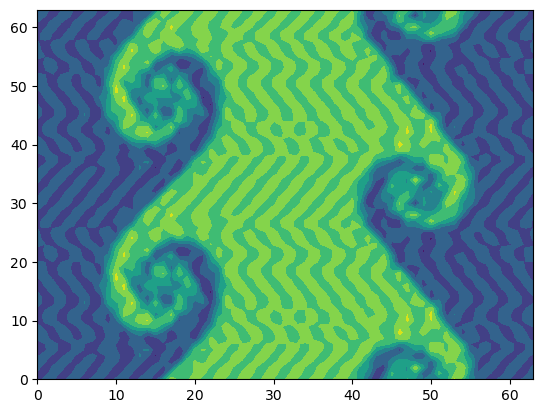

In [24]:
plt.contourf(np.array(f["UR2"]["2D"]["5000"]))

(array([  2.,   4.,   8.,  10.,  28.,  50.,  68., 112., 152., 324., 268.,
        196., 140., 102.,  80.,  70.,  62.,  62.,  58.,  56.,  48.,  36.,
         36.,  28.,  45.,  51.,  28.,  36.,  36.,  48.,  56.,  58.,  62.,
         62.,  70.,  80., 102., 140., 196., 268., 324., 152., 112.,  68.,
         50.,  28.,  10.,   8.,   4.,   2.]),
 array([-1.65826574e+00, -1.59193511e+00, -1.52560448e+00, -1.45927385e+00,
        -1.39294322e+00, -1.32661259e+00, -1.26028196e+00, -1.19395133e+00,
        -1.12762070e+00, -1.06129007e+00, -9.94959444e-01, -9.28628814e-01,
        -8.62298185e-01, -7.95967555e-01, -7.29636926e-01, -6.63306296e-01,
        -5.96975666e-01, -5.30645037e-01, -4.64314407e-01, -3.97983778e-01,
        -3.31653148e-01, -2.65322518e-01, -1.98991889e-01, -1.32661259e-01,
        -6.63306296e-02, -6.66133815e-16,  6.63306296e-02,  1.32661259e-01,
         1.98991889e-01,  2.65322518e-01,  3.31653148e-01,  3.97983778e-01,
         4.64314407e-01,  5.30645037e-01,  5.96975

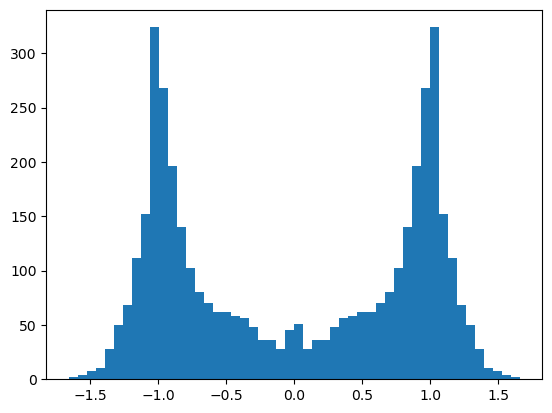

In [32]:
plt.hist(np.array(f["UR0"]["2D"]["5000"]).flatten(), bins=50)